<a href="https://colab.research.google.com/github/rodrigowe1988/Portfolio-Data-Science/blob/main/Analisando_os_Dados_do_Airbnb(Bangkok).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Análise dos Dados do Airbnb - (Bangkok)
*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="100%" src="https://quantocustaviajar.com/blog/wp-content/uploads/2016/12/como-funciona-o-airbnb.png"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Bangkok (good for visualisations).*


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/thailand/central-thailand/bangkok/2020-12-23/visualisations/listings.csv")


## Análise dos Dados


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,27934,Nice room with superb city view,120437,Nuttee,NaN,Ratchathewi,13.76000,100.54269,Entire home/apt,1660,3,65,2020-01-06,0.61,2,362
1,27942,Town House (1) bedroom available,120462,Donald,NaN,Bangkok Yai,13.73463,100.47540,Private room,906,1,0,NaN,NaN,1,0
2,27979,"Easy going landlord,easy place",120541,Emy,NaN,Bang Na,13.66746,100.61540,Private room,1148,1,0,NaN,NaN,2,358
3,28354,Place near Metro and Shopping Mall ( Monthly o...,121848,Jaruwan,NaN,Chatu Chak,13.80970,100.56527,Entire home/apt,1057,28,52,2019-12-09,0.41,1,364
4,28745,modern-style apartment in Bangkok,123784,Familyroom,NaN,Bang Kapi,13.75379,100.62422,Private room,800,60,0,NaN,NaN,1,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}'.format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 19709
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.411741
last_review                       0.411741
name                              0.000507
host_name                         0.000101
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

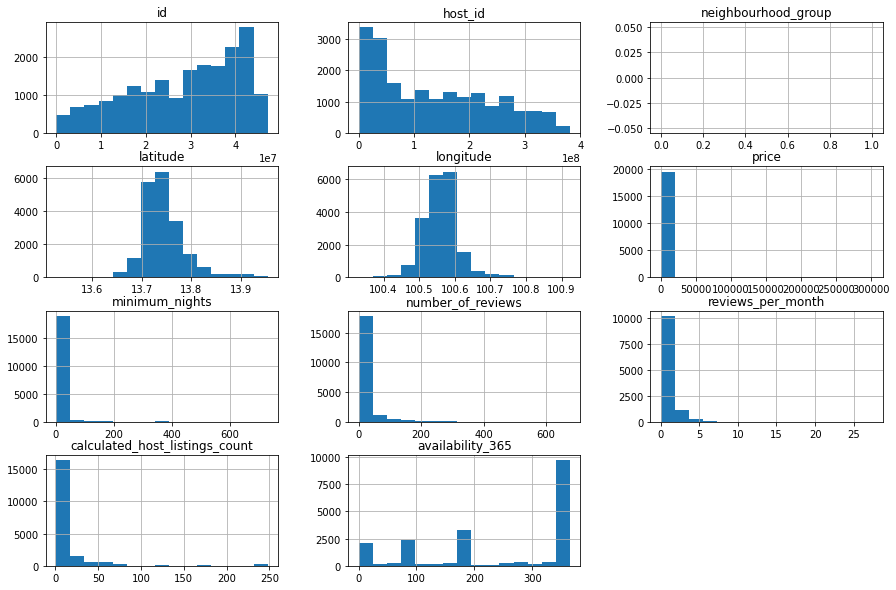

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15, 10));

### **Q4. Há outliers presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

---



In [ ]:
# ver o resumo estatístico das variáveis numéricas (somente das colunas que realmente importam para essa análise)
df[['price', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19709.000000,19709.000000,19709.000000,11594.000000,19709.000000,19709.000000
mean,2078.154244,11.046020,14.722056,0.745179,14.535339,243.398143
std,6258.269585,36.634581,36.533195,1.006266,34.831971,134.419835
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,706.000000,1.000000,0.000000,0.100000,1.000000,114.000000
50%,1100.000000,1.000000,1.000000,0.330000,4.000000,330.000000
75%,1900.000000,4.000000,11.000000,1.000000,11.000000,365.000000
max,302105.000000,730.000000,676.000000,27.390000,248.000000,365.000000


Boxplot para minimum_nights

* Separando em porcentagem as ofertas que requerem do hóspede **mais de 30 dias** como hospedagem mínima 

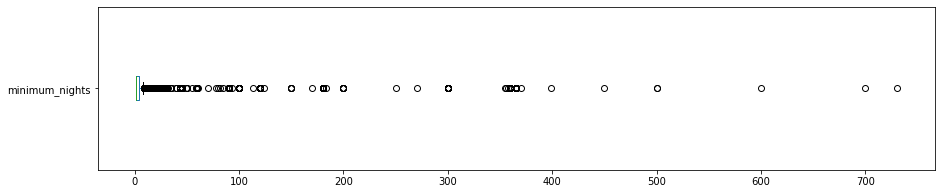

minimum_nights: valores acima de 30: 
746 entradas
3.7851%


In [ ]:
#minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30: ")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Boxplot para price

* Separando em porcentagem as ofertas que tem seu preço **acima de 1900 baht** 

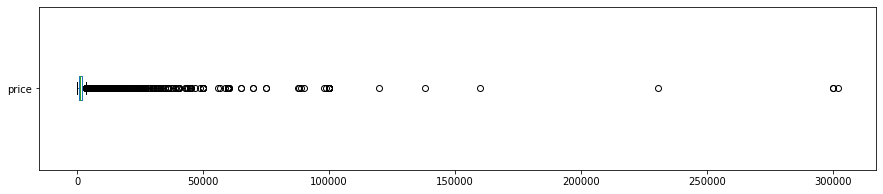


price: valores acima de 1900 baht
4886 entradas
24.7907%


In [ ]:
#price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#ver a quantidade de valores acima de 1900 na coluna price
print("\nprice: valores acima de 1900 baht")
print("{} entradas".format(len(df[df.price > 1900])))
print("{:.4f}%".format((len(df[df.price > 1900]) / df.shape[0])*100))

Histogramas sem outliers:

* Já que foi identificada uma quantidade significativa de outliers nas variáveis price e minimum_nights, vamos agora 'limpar' o DataFrame delas e plotar novamente o histograma.

A nova média dos preços de diárias para a cidade a cidade de Bangkok (removendo os outliers) é de 963.77 baht.


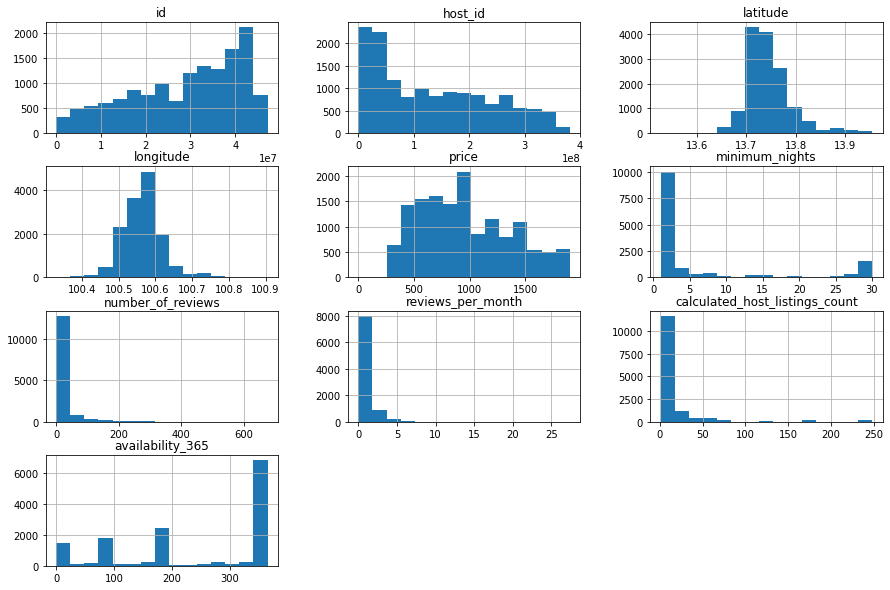

In [ ]:
#remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1900].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15, 10));

#média dos preços atualizada
new_media = df_clean.price.mean()
print(f'A nova média dos preços de diárias para a cidade a cidade de Bangkok (removendo os outliers) é de {new_media:.2f} baht.')



### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.002885,0.001674,0.012119,-0.081153,-0.008954
minimum_nights,-0.002885,1.000000,-0.053971,-0.067360,0.278273,-0.005922
number_of_reviews,0.001674,-0.053971,1.000000,0.852623,-0.028925,0.007849
reviews_per_month,0.012119,-0.067360,0.852623,1.000000,0.058112,-0.045617
calculated_host_listings_count,-0.081153,0.278273,-0.028925,0.058112,1.000000,0.042453
availability_365,-0.008954,-0.005922,0.007849,-0.045617,0.042453,1.000000


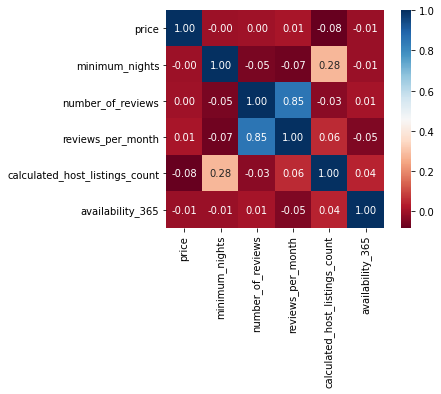

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas. 

Usando o método value_counts(), contaremos a quantidade de ocorrências de cada tipo de aluguel. 

In [ ]:
df_clean.neighbourhood.value_counts().head()

Khlong Toei    1760
Vadhana        1610
Huai Khwang    1179
Ratchathewi     988
Sathon          689
Name: neighbourhood, dtype: int64

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    7608
Private room       5236
Hotel room          705
Shared room         664
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.535285
Private room       0.368395
Hotel room         0.049602
Shared room        0.046718
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros(neighbourhoods) a partir do preço de locação. 


In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Parthum Wan       1258.947020
Vadhana           1095.475155
Khlong San        1065.262570
Yan na wa         1056.689189
Bang Rak          1051.970015
Taling Chan       1038.913043
Ratchathewi       1031.299595
Phaya Thai        1019.477500
Samphanthawong    1000.650602
Bang Kho laen      998.122449
Name: price, dtype: float64

In [ ]:
#ver a quantidade de imóveis no bairro Parthum Wan
qtd_imoveis = df_clean[df_clean.neighbourhood == 'Parthum Wan'].shape[0]
print(f'O bairro Parthum Wan possui {qtd_imoveis} imóveis cadastrados hoje no Airbnb.\n\n')

#ver o .head() com as 5 primeiras respostas do bairro Parthum Wan
df_clean[df_clean.neighbourhood == 'Parthum Wan'].head()

O bairro Parthum Wan possui 302 imóveis cadastrados hoje no Airbnb.




,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
345,2247315,Siam BTS IN 1 MIN BIG 1 BED STUDIO,4149284,Chang,Parthum Wan,13.74656,100.52949,Entire home/apt,1529,7,244,2020-02-26,2.92,3,365
379,2446205,"Condo CBD Bangkok, 100m fr. skytrain (Ratchada...",11449258,Peung Pataraporn,Parthum Wan,13.73950,100.54065,Entire home/apt,966,23,2,2018-05-14,0.02,1,180
391,2492235,"Prime location,near BTS Ratchadamri",10535148,Panumas,Parthum Wan,13.74031,100.54094,Entire home/apt,1177,1,53,2017-11-05,0.71,1,237
463,2996027,Clean Comfy at Chidlom 2 mins toBTS,15270186,Gee,Parthum Wan,13.74468,100.54300,Private room,1800,3,15,2020-01-24,0.20,8,365
517,3532103,"Modern & spacious, center Bangkok, Ploenchit BTS",17781158,Pim,Parthum Wan,13.73662,100.55039,Entire home/apt,750,7,63,2019-08-05,0.89,1,89


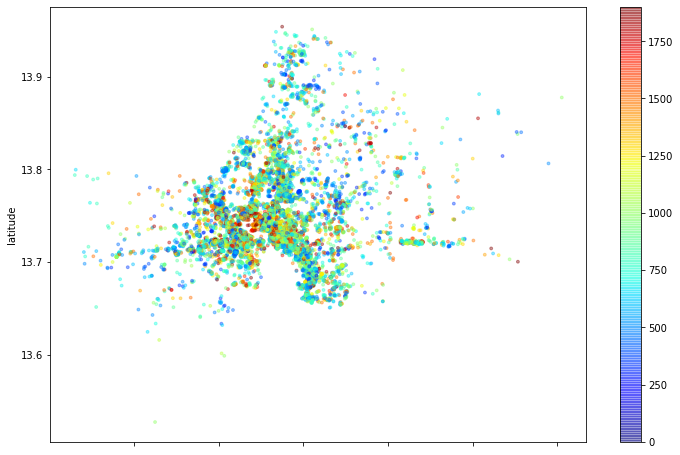

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
media_noites = df_clean.minimum_nights.mean()
print('Usando os dados obtidos podemos ver que a média do número de noites mímimas que cada anúncio pede é de {:.2f} noites.'.format(media_noites))

Usando os dados obtidos podemos ver que a média do número de noites mímimas que cada anúncio pede é de 5.99 noites.


## Conclusões


Análise simples sobre a cidade de Bangkok e suas inúmeras ofertas de reserva no site Airbnb. Alguns detalhes importantes:

* como o preço máximo de algumas dessas ofertas fugia muito da 'média real'(ocorrência de alguns outliers com valores que superam 20x o valor da mediana), optei por filtrar e exclui-los.

* como pode ser facilmente notado, é um breve artigo de um aspirante a Cientista de Dados e com o tempo, garanto que meus artigos terão uma qualidade nitidamente maior.
